In [1]:
import os
# CHANGE: remove logger/logging

import numpy as np
from tqdm import trange
import tensorflow as tf

from utils import *
from network import Network
from statistic import Statistic

import network
import statistic
import ops
import utils

# network 
# CHANGE: replaced flags with variables
model = "pixel_cnn"
batch_size = 100
hidden_dims = 64
recurrent_length = 2
out_hidden_dims = 64
out_recurrent_length = 2
use_residual = False

# training
max_epoch = 50 #100000
test_step = 100
save_step = 1000
learning_rate = 1e-3
grad_clip = 1
use_gpu = True

# data
data = "mnist"
data_dir = "data"
sample_dir = "samples"

# Debug
is_train = True 
display = False
log_level = "INFO"
random_seed = 123

# random seed
tf.set_random_seed(random_seed)
np.random.seed(random_seed)

all_train_err = []
all_test_err = []

def main(_):
    model_dir = "model"
    
    DATA_DIR = os.path.join(data_dir, data)
    SAMPLE_DIR = os.path.join(sample_dir, data, model_dir)

    check_and_create_dir(DATA_DIR)
    #check_and_create_dir(SAMPLE_DIR)
    SAMPLE_DIR = 'sample'

    # 0. prepare datasets
    if data == "mnist":
        from tensorflow.examples.tutorials.mnist import input_data
        mnist = input_data.read_data_sets(DATA_DIR, one_hot=True)

        next_train_batch = lambda x: mnist.train.next_batch(x)[0]
        next_test_batch = lambda x: mnist.test.next_batch(x)[0]

        height, width, channel = 28, 28, 1

        train_step_per_epoch = int(mnist.train.num_examples / batch_size)
        test_step_per_epoch = int(mnist.test.num_examples / batch_size)
    elif data == "cifar":
        from cifar10 import IMAGE_SIZE, inputs

        maybe_download_and_extract(DATA_DIR)
        images, labels = inputs(eval_data=False,
            data_dir=os.path.join(DATA_DIR, 'cifar-10-batches-bin'), batch_size=batch_size)

        height, width, channel = IMAGE_SIZE, IMAGE_SIZE, 3

    with tf.Session() as sess:
        network = Network(sess, height, width, channel)

        stat = Statistic(sess, data, model_dir, tf.trainable_variables(), test_step)
        stat.load_model()

        if is_train:
            print("Training starts!")

            initial_step = stat.get_t() if stat else 0
            iterator = trange(max_epoch, ncols=70, initial=initial_step)

            for epoch in iterator:
                # 1. train
                total_train_costs = []
                for idx in range(train_step_per_epoch):
                    images = binarize(next_train_batch(batch_size)).reshape([batch_size, height, width, channel])

                    cost = network.test(images, with_update=True)
                    total_train_costs.append(cost)

                # 2. test
                total_test_costs = []
                for idx in range(test_step_per_epoch):
                    images = binarize(next_test_batch(batch_size)).reshape([batch_size, height, width, channel])

                    cost = network.test(images, with_update=False)
                    total_test_costs.append(cost)

                avg_train_cost, avg_test_cost = np.mean(total_train_costs), np.mean(total_test_costs)

                stat.on_step(avg_train_cost, avg_test_cost)
                print("Epoch: {}".format(epoch))
                print("train l: {}, test l: {}".format(avg_train_cost, avg_test_cost))
                all_train_err.append(avg_train_cost)
                all_test_err.append(avg_test_cost)
                print()
                
            print("ALL TRAIN ERRORS: ")
            print(all_train_err)
            print()
            print("ALL TEST ERRORS: ")
            print(all_test_err)
            print()
            iterator.set_description("train l: %.3f, test l: %.3f" % (avg_train_cost, avg_test_cost))

            # 3. generate samples
            samples = network.generate()
            save_images(samples, height, width, 10, 10,
                directory=SAMPLE_DIR, prefix="epoch_%s" % epoch)

        else:
            print("Image generation starts!")

            samples = network.generate()
            save_images(samples, height, width, 10, 10, directory=SAMPLE_DIR)
            
        print('Errors:')
        print(avg_train_cost)
        print(avg_test_cost)

if __name__ == "__main__":
    tf.app.run()

Skip creating directory: data\mnist
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data\mnist\t10k-images-idx3-ubyte.gz
Extracting data\mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Building pixel_cnn starts!
Building conv_inputs
[conv2d_a] conv_inputs : Placeholder:0 (?, 28, 28, 1) -> conv_inputs/outputs_plus_b:0 (?, 28, 28, 64)
[conv2d_b] CONV0 : conv_inputs/outputs_plus_b:0 (?, 28, 28, 64) -> CONV0/outputs_plus_b:0 (?, 28, 28, 3)
Building C

  2%|▊                                         | 1/50 [00:00<?, ?it/s]

Saving checkpoints...
Epoch: 0
train l: 0.2353624701499939, test l: 0.13556712865829468



  4%|█▏                             | 2/50 [04:42<3:46:15, 282.83s/it]

Saving checkpoints...
Epoch: 1
train l: 0.13665860891342163, test l: 0.1351926177740097



  6%|█▊                             | 3/50 [08:58<3:35:05, 274.58s/it]

Saving checkpoints...
Epoch: 2
train l: 0.13480541110038757, test l: 0.1329464316368103



  8%|██▍                            | 4/50 [13:08<3:24:54, 267.27s/it]

Saving checkpoints...
Epoch: 3
train l: 0.13372598588466644, test l: 0.1322912871837616



 10%|███                            | 5/50 [17:15<3:15:49, 261.10s/it]

Saving checkpoints...
Epoch: 4
train l: 0.13316181302070618, test l: 0.13316874206066132



 12%|███▋                           | 6/50 [21:22<3:08:33, 257.12s/it]

Saving checkpoints...
Epoch: 5
train l: 0.13278189301490784, test l: 0.13221204280853271



 14%|████▎                          | 7/50 [25:50<3:06:27, 260.18s/it]

Saving checkpoints...
Epoch: 6
train l: 0.1325594186782837, test l: 0.13262568414211273



 16%|████▉                          | 8/50 [30:15<3:03:14, 261.78s/it]

Saving checkpoints...
Epoch: 7
train l: 0.13241800665855408, test l: 0.13123735785484314



 18%|█████▌                         | 9/50 [34:22<2:55:43, 257.15s/it]

Saving checkpoints...
Epoch: 8
train l: 0.13226667046546936, test l: 0.13124088943004608



 20%|██████                        | 10/50 [38:20<2:47:37, 251.43s/it]

Saving checkpoints...
Epoch: 9
train l: 0.13218143582344055, test l: 0.13138964772224426



 22%|██████▌                       | 11/50 [42:07<2:38:44, 244.21s/it]

Saving checkpoints...
Epoch: 10
train l: 0.13213740289211273, test l: 0.1313731074333191



 24%|███████▏                      | 12/50 [46:01<2:32:38, 241.01s/it]

Saving checkpoints...
Epoch: 11
train l: 0.13203932344913483, test l: 0.13113336265087128



 26%|███████▊                      | 13/50 [49:50<2:26:29, 237.56s/it]

Saving checkpoints...
Epoch: 12
train l: 0.1319512575864792, test l: 0.13094741106033325



 28%|████████▍                     | 14/50 [53:49<2:22:43, 237.87s/it]

Saving checkpoints...
Epoch: 13
train l: 0.13190871477127075, test l: 0.1311458945274353



 30%|█████████                     | 15/50 [57:42<2:17:58, 236.53s/it]

Saving checkpoints...
Epoch: 14
train l: 0.13181741535663605, test l: 0.1308349370956421



 32%|████████▉                   | 16/50 [1:01:42<2:14:32, 237.41s/it]

Saving checkpoints...
Epoch: 15
train l: 0.13174360990524292, test l: 0.13092654943466187



 34%|█████████▌                  | 17/50 [1:05:35<2:09:53, 236.16s/it]

Saving checkpoints...
Epoch: 16
train l: 0.1317480504512787, test l: 0.13085202872753143



 36%|██████████                  | 18/50 [1:09:33<2:06:14, 236.72s/it]

Saving checkpoints...
Epoch: 17
train l: 0.1317310482263565, test l: 0.13092680275440216



 38%|██████████▋                 | 19/50 [1:13:48<2:05:07, 242.17s/it]

Saving checkpoints...
Epoch: 18
train l: 0.1316477209329605, test l: 0.1309998631477356



 40%|███████████▏                | 20/50 [1:18:00<2:02:38, 245.27s/it]

Saving checkpoints...
Epoch: 19
train l: 0.13159231841564178, test l: 0.13162773847579956



 42%|███████████▊                | 21/50 [1:21:57<1:57:15, 242.59s/it]

Saving checkpoints...
Epoch: 20
train l: 0.13153941929340363, test l: 0.13054966926574707



 44%|████████████▎               | 22/50 [1:24:41<1:42:20, 219.30s/it]

Saving checkpoints...
Epoch: 21
train l: 0.13154444098472595, test l: 0.1305260807275772



 46%|████████████▉               | 23/50 [1:27:25<1:31:11, 202.66s/it]

Saving checkpoints...
Epoch: 22
train l: 0.13140007853507996, test l: 0.13160285353660583



 48%|█████████████▍              | 24/50 [1:30:04<1:22:08, 189.57s/it]

Saving checkpoints...
Epoch: 23
train l: 0.13143455982208252, test l: 0.13133776187896729



 50%|██████████████              | 25/50 [1:32:43<1:15:09, 180.39s/it]

Saving checkpoints...
Epoch: 24
train l: 0.13144180178642273, test l: 0.13042369484901428



 52%|██████████████▌             | 26/50 [1:35:25<1:09:51, 174.64s/it]

Saving checkpoints...
Epoch: 25
train l: 0.13139966130256653, test l: 0.13043810427188873



 54%|███████████████             | 27/50 [1:38:09<1:05:45, 171.52s/it]

Saving checkpoints...
Epoch: 26
train l: 0.13133938610553741, test l: 0.13082557916641235



 56%|███████████████▋            | 28/50 [1:40:52<1:01:56, 168.92s/it]

Saving checkpoints...
Epoch: 27
train l: 0.13135530054569244, test l: 0.13041141629219055



 58%|█████████████████▍            | 29/50 [1:43:30<57:59, 165.70s/it]

Saving checkpoints...
Epoch: 28
train l: 0.13130545616149902, test l: 0.13049422204494476



 60%|██████████████████            | 30/50 [1:46:03<53:58, 161.93s/it]

Saving checkpoints...
Epoch: 29
train l: 0.1313575804233551, test l: 0.13086241483688354



 62%|██████████████████▌           | 31/50 [1:48:47<51:27, 162.53s/it]

Saving checkpoints...
Epoch: 30
train l: 0.13129495084285736, test l: 0.13034884631633759



 64%|███████████████████▏          | 32/50 [1:52:26<53:49, 179.43s/it]

Saving checkpoints...
Epoch: 31
train l: 0.1312783807516098, test l: 0.13098417222499847



 66%|███████████████████▊          | 33/50 [1:55:55<53:21, 188.34s/it]

Saving checkpoints...
Epoch: 32
train l: 0.13122977316379547, test l: 0.13056376576423645



 68%|████████████████████▍         | 34/50 [1:59:32<52:31, 196.99s/it]

Saving checkpoints...
Epoch: 33
train l: 0.13120077550411224, test l: 0.13070684671401978



 70%|█████████████████████         | 35/50 [2:03:00<50:04, 200.30s/it]

Saving checkpoints...
Epoch: 34
train l: 0.1311648041009903, test l: 0.13072441518306732



 72%|█████████████████████▌        | 36/50 [2:06:29<47:21, 202.93s/it]

Saving checkpoints...
Epoch: 35
train l: 0.1311357021331787, test l: 0.1302720308303833



 74%|██████████████████████▏       | 37/50 [2:10:00<44:29, 205.35s/it]

Saving checkpoints...
Epoch: 36
train l: 0.13111674785614014, test l: 0.1301508992910385



 76%|██████████████████████▊       | 38/50 [2:13:28<41:12, 206.07s/it]

Saving checkpoints...
Epoch: 37
train l: 0.131070077419281, test l: 0.13029226660728455



 78%|███████████████████████▍      | 39/50 [2:16:54<37:47, 206.09s/it]

Saving checkpoints...
Epoch: 38
train l: 0.13107116520404816, test l: 0.13028384745121002



 80%|████████████████████████      | 40/50 [2:20:27<34:41, 208.17s/it]

Saving checkpoints...
Epoch: 39
train l: 0.131016343832016, test l: 0.1302873194217682



 82%|████████████████████████▌     | 41/50 [2:23:56<31:15, 208.37s/it]

Saving checkpoints...
Epoch: 40
train l: 0.13107214868068695, test l: 0.13011321425437927



 84%|█████████████████████████▏    | 42/50 [2:27:33<28:06, 210.85s/it]

Saving checkpoints...
Epoch: 41
train l: 0.13099783658981323, test l: 0.1301354467868805



 86%|█████████████████████████▊    | 43/50 [2:30:59<24:27, 209.60s/it]

Saving checkpoints...
Epoch: 42
train l: 0.13094931840896606, test l: 0.13017764687538147



 88%|██████████████████████████▍   | 44/50 [2:34:18<20:38, 206.46s/it]

Saving checkpoints...
Epoch: 43
train l: 0.1309972107410431, test l: 0.13111254572868347



 90%|███████████████████████████   | 45/50 [2:37:57<17:30, 210.03s/it]

Saving checkpoints...
Epoch: 44
train l: 0.13099606335163116, test l: 0.13062191009521484



 92%|███████████████████████████▌  | 46/50 [2:41:35<14:09, 212.45s/it]

Saving checkpoints...
Epoch: 45
train l: 0.13095088303089142, test l: 0.12994012236595154



 94%|████████████████████████████▏ | 47/50 [2:45:11<10:41, 213.72s/it]

Saving checkpoints...
Epoch: 46
train l: 0.13095150887966156, test l: 0.13003656268119812



 96%|████████████████████████████▊ | 48/50 [2:49:59<07:51, 235.90s/it]

Saving checkpoints...
Epoch: 47
train l: 0.13093829154968262, test l: 0.12979120016098022



 98%|█████████████████████████████▍| 49/50 [2:55:07<04:17, 257.53s/it]

Saving checkpoints...
Epoch: 48
train l: 0.13083989918231964, test l: 0.13026131689548492



100%|██████████████████████████████| 50/50 [3:00:15<00:00, 272.51s/it]

Saving checkpoints...
Epoch: 49
train l: 0.13087321817874908, test l: 0.13002048432826996



51it [3:08:00, 330.45s/it]                                            


ALL TRAIN ERRORS: 
[0.23536247, 0.13665861, 0.13480541, 0.13372599, 0.13316181, 0.1327819, 0.13255942, 0.132418, 0.13226667, 0.13218144, 0.1321374, 0.13203932, 0.13195126, 0.13190871, 0.13181742, 0.13174361, 0.13174805, 0.13173105, 0.13164772, 0.13159232, 0.13153942, 0.13154444, 0.13140008, 0.13143456, 0.1314418, 0.13139966, 0.13133939, 0.1313553, 0.13130546, 0.13135758, 0.13129495, 0.13127838, 0.13122977, 0.13120078, 0.1311648, 0.1311357, 0.13111675, 0.13107008, 0.13107117, 0.13101634, 0.13107215, 0.13099784, 0.13094932, 0.13099721, 0.13099606, 0.13095088, 0.13095151, 0.13093829, 0.1308399, 0.13087322]

ALL TEST ERRORS: 
[0.13556713, 0.13519262, 0.13294643, 0.13229129, 0.13316874, 0.13221204, 0.13262568, 0.13123736, 0.13124089, 0.13138965, 0.1313731, 0.13113336, 0.13094741, 0.1311459, 0.13083494, 0.13092655, 0.13085203, 0.1309268, 0.13099986, 0.13162774, 0.13054967, 0.13052608, 0.13160285, 0.13133776, 0.1304237, 0.1304381, 0.13082558, 0.13041142, 0.13049422, 0.13086241, 0.13034885, 0.

                            
                            
                            
                            
                            
                            
                      #     
                            
                            
     #              #       
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
         #                  
                            
                         #  
============== ( 0,  9) ==============
                      #     
                            
                            
          #                 
                            
                            
                            
                            
                            
    

                            
                            
                            
 #             #            
                            
                            
============== ( 0, 18) ==============
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
 #                          
                            
                            
    #                       
                            
                            
                            
                            
                            
 #                          
                            
                            
                            
                            
                            
    

                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 1,  0) ==============
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
    

                         #  
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                      #     
                            
                            
 #                  #       
                            
============== ( 1, 10) ==============
                            
                            
                            
                            
      #                   # 
    

                            
                            
                            
                            
                            
            #               
                            
                            
                            
                            
============== ( 1, 19) ==============
                            
 #                          
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
    

            #               
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 2,  1) ==============
                            
                            
                            
                            
               #            
                            
                            
                            
                            
                            
                            
                            
   #

                            
                            
                            
============== ( 2, 10) ==============
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
     #                      
                            
                            
                            
                            
   #                        
                            
                            
                            
============== ( 2, 11) ==============
                       

                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 2, 20) ==============
                            
                            
                            
                            
                            
                       #    
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
    

                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
#                           
                            
                            
                            
                            
       #                    
                            
                            
                            
                            
                            
                            
   #                        
============== ( 3,  2) ==============
                            
                            
                            
                            
                            
                            
                            
                     #      
    

                            
                            
                            
                            
                            
                            
                            
============== ( 3, 11) ==============
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
#                           
                            
                            
                            
                            
                            
                            
                            
                            
                            
    

                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 3, 21) ==============
                            
                            
                            
                            
                            
           #                
                            
                            
                            
                            
                            
                            
                            
                            
                            
    

============== ( 4,  2) ==============
                            
                            
   #                        
                            
                            
                            
                            
                            
                            
                            
                            
 #                          
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
     #                      
                            
                            
                            
                            
                            
============== ( 4,  3) ==============
                            
                            
                            
                       

                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 4, 12) ==============
                            
                      #     
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                         #  
                            
                            
                            
 #                          
                            
                            
                            
               #            
                            
    

                            
                            
                            
                      #     
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
      #                     
                            
                            
                            
                            
                            
                    #       
                            
============== ( 4, 22) ==============
                     #      
                 #          
                            
                            
                            
                            
                            
                            
                            
                            
                            
    

                            
                            
                       #    
                            
============== ( 5,  3) ==============
                            
                            
                            
 #                          
                            
                            
                            
   #                        
        #                   
                            
                            
                      #     
                            
                            
                            
                            
                            
                            
       #                    
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 5,  4) =========

                            
       #                    
                            
 #                          
                            
                            
                            
                            
 #                          
                            
                            
                            
                            
                            
                            
============== ( 5, 13) ==============
                            
             #              
                            
                            
        #                   
      ###                   
  # ###                     
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
    

                            
                            
#                           
      #   #                 
   # ####                   
                            
                            
                            
  #                         
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 5, 23) ==============
                            
                            
                            
                      #     
                            
        ##                  
  #  ##                     
    

                            
                            
                            
        #                   
                            
                            
                            
                            
============== ( 6,  4) ==============
                            
           #                
                            
                            
                            
      ###                   
     ## #                   
## #                   #    
                            
                            
                            
                            
                            
                      #     
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
    

                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 6, 18) ==============
 #                          
                            
                            
                            
            #               
      # ##                  
    ######                  
     # #                    
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
    

  ##                        
  #                         
                            
                            
                #           
                            
                            
                            
                            
                            
                            
                            
                            
                    #       
                            
                            
                            
                            
                            
                            
                            
============== ( 7,  0) ==============
          #                 
                            
                            
                            
                            
       # #                  
     #####                  
 # # #                      
                            
                            
                            
                            
    

                            
                            
                            
============== ( 7,  9) ==============
                            
                            
                            
                            
                        #   
      ## #                  
    ######                  
   ## ##                    
                            
                            
                            
                            
      #                     
                            
                            
                            
                            
                        #   
                            
                            
                     #      
                            
                            
                            
                            
                            
          #                 
                            
============== ( 7, 10) ==============
                       

                            
                            
                            
                            
                            
     #                      
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 7, 19) ==============
                            
                            
                            
                            
                            
       ##               #   
    #####                   
     ### #                  
      # #                   
                            
                            
                            
                            
                            
                            
                            
                            
                            
        #                   
    

                            
                            
      # ##                  
    ######                  
   ## ###                   
      ##                    
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 8,  1) ==============
        #                   
                            
                            
                            
                            
      ####                  
    ## #                    
   ## ####                  
    

               #            
                            
                            
                            
                            
                            
                            
============== ( 8, 10) ==============
                            
                            
                            
                            
                            
        #                   
    #####                   
  ###                       
      ## #                  
     ##                     
                            
                            
                            
                            
                            
                            
                            
                     #      
                            
                            
                            
                            
                            
                            
                            
                            
    

                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 8, 20) ==============
                            
                            
                            
                            
                            
      ## #                  
   #######                  
  #   ###                   
    # ####                  
    ##                      
                            
                            
                            
                            
                            
    

============== ( 9,  8) ==============
                            
                            
                            
                            
                            
    # ####                  
    # ##                    
  ##  ##                    
     ##                     
    ## #                    
                            
                            
                         #  
                            
                            
                            
                            
                            
                            
                      #     
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 9,  9) ==============
                            
                            
                            
                       

                            
                #           
                          # 
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 9, 27) ==============
                            
                            
                            
                      #     
                            
      ###                   
    ######                  
   # ## #       #           
     #####                  
      ##                    
                            
                            
                            
                            
                            
                            
                            
                            
    

                            
                            
                            
      # #                   
     #####                  
   #### #                   
    # ##                    
    # #                     
                            
                            
        #                   
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== (10,  9) ==============
                            
                      #     
                            
                            
                            
      ## #                  
    #####                   
 # #

                            
                            
                            
                            
       ##                   
    #####                   
 # # ## #                   
      ###                   
    ### #                   
                            
  #                         
                            
                            
                            
            #               
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== (10, 27) ==============
          #                 
     #                      
                            
                            
                            
      #  #                  
 #  

                            
                            
                            
                            
                            
                            
                            
                            
                            
============== (11,  8) ==============
                            
                            
                            
                            
                            
      ####                  
    ######                  
  ### ##                    
    # ##                    
                            
                            
                            
                            
                            
                            
                            
  #                         
                            
                            
                            
                            
                            
  #                         
                            
    

        #                   
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== (12,  0) ==============
                            
                            
                            
                            
                            
       # #                  
    #####                   
  ##  ####        #         
      ####                  
      ##                    
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
    

   #######                  
 #### # ##                  
     ####                   
    #    #                  
                            
                            
                            
                            
                            
                            
           #    #           
         #                  
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== (12, 18) ==============
                            
                            
                            
                            
                            
      #  #                  
    #####                   
 # #### #                   
    #####                   
     ## #                   
                            
    

                            
                            
                            
                            
============== (12, 27) ==============
                            
                            
                            
                            
                            
        #                   
    #####                   
    #  ##                   
     ###   #                
      ##                    
                            
                            
                            
                            
         #                  
                            
                            
                            
                            
                            
                            
                            
                            
                            
                  #         
           #                
                          # 
                     #      
============== (13,  0) =========

                            
                            
    #                 #     
                            
                            
                            
                            
           #                
                            
                            
                            
                            
                            
                            
                            
                            
                        #   
                            
============== (13, 17) ==============
                            
   #                        
                            
                          # 
                            
      ###                   
   #####                    
  #    ##                   
      ###                   
     ##                     
         #                  
                     #      
                            
                            
                            
    

============== (13, 26) ==============
                            
                            
                            
                            
                            
        ##                  
    ## #                    
   #  ####                  
  #   ###                   
    ###                     
                            
                            
                            
                       #    
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== (13, 27) ==============
                            
                            
                            
                       

                            
                            
                            
                            
                            
                            
                            
                           #
                            
                            
                            
                            
                            
                            
============== (14, 16) ==============
                  #         
                            
                            
                            
                            
      ###                   
    #####     #             
   # ### #                  
       ##                   
       #                    
                            
                            
                            
                            
                            
                            
                            
#                           
                            
    

                            
                            
                            
                            
                            
      ## #                  
    ######                  
  # # ###                   
     #####                  
      ###                   
                            
                     #      
                            
                            
                            
     #                      
                            
                            
                            
                            
                            
                            
                            
                            
                       #    
                            
                            
                            
============== (15,  6) ==============
 #                          
                            
                            
                            
                  #         
    

                            
                            
                       #    
                            
                            
                            
                            
                            
                            
                            
============== (15, 15) ==============
                            
                            
                            
                            
                            
      ###                   
    #####      #            
  # ####                    
      # #                   
      ##                    
                            
                            
                            
                            
                            
      ## ####               
      # ## #                
                            
                            
                            
               #            
                            
                            
    

                            
                            
                            
                            
                            
                            
                            
       #                    
                            
                            
============== (16,  5) ==============
                            
                            
                            
                            
                            
      #                     
    ######                  
 #######                    
      ###                   
       #                    
                            
                            
                            
                            
                            
      ## ## #               
     #### ##                
   ##                       
     #                      
                            
                            
                            
                            
    

  ## ###                    
       #                    
   # #                      
                            
                            
                            
                            
                            
       #  ###               
  ## # ##### #              
   ### ### # #              
                            
                            
                            
                            
                            
          #                 
                            
                            
                            
#                           
============== (16, 15) ==============
            #               
                            
                            
                            
                            
      ####               #  
  # ######                  
    # # #               #   
     #####                  
   # ###                    
                            
                            
    

  #   ###                   
    #####            #      
               #       #    
                            
                            
                            
                            
      #  # ##               
    #########               
   #####  # #               
  # #                       
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== (17,  7) ==============
                            
                            
                            
         #                  
                            
      ###                   
    ######                  
 # # ## #                   
      ###    #              
       #                    
                            
                            
                            
    

                            
                            
============== (17, 16) ==============
                            
============== (17, 24) ==============
                            
                            
                            
                            
                            
      ####         #        
    ######                  
  ##  ####                  
  ## # #         #          
     ##                     
                            
                            
                            
                            
                            
      ##  ####              
    ######## #              
   #########                
 #         ##               
                         #  
                            
                            
                            
                            
                            
        #   #               
                            
                            
============== (17, 25)

                            
                 #          
                            
       # ###                
    ###### #                
   ######### #              
  # #                       
                            
                            
                            
                            
                  #         
                            
                            
                            
                            
============== (18,  6) ==============
                            
                            
                            
                            
                            
      ##                    
    ######                  
 # #  # #                   
     ###  #                 
      ###                   
                            
                            
                            
                            
                            
      ##    #               
    ### #### #              
   #

============== (18, 23) ==============
                            
                            
                       #    
                            
                            
      #  #                  
    ######                  
  #   ####                  
                            
    # #                     
                            
                            
                            
   #                        
                           #
      ##  ###               
   # ########  #            
   ####### # #              
  # #####  # # #            
    #                       
                            
                            
                            
                            
                            
                            
               #            
                            
============== (18, 24) ==============
                            
                #           
                            
                       

  ### ### ##                
# ####     # ##             
  ##      #                 
####                        
                            
                            
                            
                            
                            
                            
   #                        
============== (19,  5) ==============
                            
                            
                            
                           #
                            
      ## #                  
   #######                  
   # #  ##                  
      ##                    
     ## #                   
                            
                            
                            
                            
                            
       # # #                
     ########               
   ####### ###              
 #####     # #              
  ###       ##     #        
  ##                        
                            
    

      #                     
                            
      # #                   
    #####                   
  ##  ##                    
      ###           #       
     ##                     
                            
              #             
                            
                            
                            
       #  #                 
     ########               
   #########                
 #  ##     ###              
   ##     ###               
   #        ####            
                            
                            
                            
                            
                            
                            
                            
============== (19, 23) ==============
                            
                            
                            
                            
                            
      ####                  
    ### #                   
   ### #                    
    

                            
                            
                            
   #                        
                            
                            
                            
============== (20,  4) ==============
                            
(20, 12) ==============
   #                        
                            
                            
                            
                            
       ###                  
   #######                  
  # #####                   
      ###                   
     ## #                   
                            
                            
                            
                            
                            
       ## ##                
     #######                
   ### ### ##               
   ###    #####             
  ##     #   ##             
 ###        # #    #        
                            
              #             
                            
         

     ####                   
                            
                            
                            
                            
                            
                            
      ## ## ##              
     # ######               
   ###########              
  #####      #              
   #       #                
            ###             
            ## #            
                            
                            
                            
                            
                            
                            
============== (20, 22) ==============
                            
                            
                            
                            
                            
      ####                  
    ######                  
  ## ###                    
    # ##                    
     ##                     
                            
                            
                            
    

                            
                            
                            
                            
 #                          
============== (21, 11) ==============
                            
                            
                            
                            
                            
      ##                    
    #####                   
   ## # ##                  
    ####                    
     ###                    
     #                      
                            
                            
      #                     
                            
      #  ####               
    ######## #              
   #### # ###         #     
   ###     #                
  ##        #  #            
  ##        # #             
            ####            
 #                          
                            
                            
                            
                            
                            
====

                            
                            
                            
       # ###                
    ######## #              
   ##### # ##               
 ####      #                
  ###    #  ## #            
 ###         ##             
            #### #  #       
 #         ##  ##           
                            
                            
                            
                            
                            
============== (21, 21) ==============
                            
                            
                            
                            
                   #        
      #                     
    ####                    
   # #  #                   
      ##                    
      #                     
                            
                     #      
                            
                      #     
                            
      #  # # #              
     ######  #              
   #

   ######  # #              
  #       ## #              
   ##     ####              
   #         ##             
  #          ###     # #    
###         ##      # #     
###       #                 
                            
                            
                            
                            
============== (22, 14) ==============
                            
                            
                            
                            
                            
        #                   
    ## ###                  
 #   ##                     
      ####                  
  #   #                     
                            
                            
                            
                            
                            
          ### #             
    ##### ####              
   ## #### ##               
  ######     #              
   ##        # #            
   #        ### #           
             ###     #      
 # #

    #####                   
 ##  ### #                  
     ####                   
     # #           #        
                            
                            
                            
                            
                            
      ##  #                 
    ##########   #          
   ## # ## ###              
# #  #     # ##             
 # ##    #  ###             
   #         ###            
   #### ### #               
 #####    ## #              
   ##       # #             
   #         ###            
  #          ####     ##   #
 ##         ##### # ##      
####      #####   ###       
 #                          
                            
                            
         #                  
============== (23,  4) ==============
                            
                            
                            
                            
                            
       #                    
   #######                  
  ##

 ###          #             
            ######   ##     
 ###        #####  ###      
### ## # #### #             
### #######                 
                            
                            
                            
============== (23, 13) ==============
                            
                            
                            
                            
                            
      ####                  
    ######                  
   #  # #                   
      ## #                  
    # #                     
                            
                            
                            
                            
                            
      #     #               
     #######                
   ####### # #              
  # ###   ###               
   ##      #  #             
             ##             
            ###       ##    
 ###        ####    ### #   
 #  # ###### # #  ##        
###   ## ##                 
    

     # #####                
   ##########               
 ## ##     #  #             
  ###      ##  #            
 # #         ## #           
  #          ###     # #    
 # #        ##### # ##      
####  ### #####    ##       
### ### ### #     # ##      
#                           
                            
                            
============== (24,  3) ==============
                            
                            
                            
                            
                            
         #                  
 # ######                   
  ##### #                   
     ###                    
      ##                    
                            
                            
                            
                            
                            
      #  ###                
   # ###### ##              
    ##### ###               
 ## ## #   #                
  ###  #   # ##             
 ###         ## #           
    

      ####                  
    #### #                  
####  # ##                  
  #  ####          #        
         #                  
                            
                            
                            
                #           
                            
      ##    ##              
     #########              
   ##########               
######     ##               
  ##         #              
  ##        ###             
  #          ###     ###    
 ##         #####   ###     
##      ######     ##       
# #### ######## #  # #      
#      ##                   
                            
                            
============== (24, 13) ==============
                            
                            
                            
                            
                            
      ####                  
    #####                   
   # #####    #             
      # #                   
        #                   
    

            ######   # #    
###         #####  ####     
#### ##### #####   ###      
#############       ##      
 # ##  #          # ##      
                            
                            
============== (25,  2) ==============
                            
                            
                            
                            
                            
      ##                    
   ######                   
     ##                     
      ##                    
     ####                   
                            
                            
                            
                            
                            
      ## ###                
    ##### ##                
    ###### #                
 ## ## #   #  ##            
   #       ###              
  #          # #            
  #          ##  #   # #    
 # ##      #### #   ###     
##  # # #######    ##       
# ##########      ####      
  ## # #   #       ##       
    

                            
                            
                            
                            
                            
      #   # #               
    ########                
    ###### #                
 ## ##    ##                
   ##       ###             
  #           #             
  #          ##        #    
## #        #####  ####     
 ##   #  #####              
 #### ##### ##    # ##      
############      # #   #   
      #                     
                            
============== (25, 12) ==============
         #                  ============== (25, 19) ==============
                            
                            
                  #  #      
                            
                            
      # ##                  
    #####                   
  ##  ###                   
    # ##                    
     #                      
                            
                            
                        

                     ###    
                            
============== (26,  0) ==============
                            
                            
                            
                            
                            
      # ##                  
    # ###                   
  ## #             #        
     ###                    
    # ##                    
                            
                            
                            
                            
                           #
          ###               
   # #######                
   ####### ##               
    ####   #  #             
   #     #   # #            
 # #         ## #           
           # # ###    #     
 # #     # #####   ###      
# #     ##### ##   ##       
##### ########    ####      
  ####  ###  #     ###  #   
                     ####   
                            
============== (26,  1) ==============
                            
                       

                            
                            
                            
      ## ####               
    ## ######               
   ####### # # #            
 # #####  ###               
   #        ##              
 # #         ## #           
  #         ###  #   ##     
##          #####   ###     
  #   #   ######  ###       
 ####  ### ###    ### #     
##### # ## #       # ##     
 #        ##         ###    
        # #                 
============== (26, 18) ==============
                        #   
                            
                            
                            
                            
      # #                   
    ######                  
   ## ###                   
  #   ####                  
      #                     
                            
                            
                            
                            
                            
      ##  ###               
     ##### ##              #
   #

                            
                            
                            
                            
          #                 
    ### ##                  
 ###   #                    
      # #                   
      ##                    
                            
                            
                            
                            
                            
      ## #  #               
    #########               
 # ######   #               
### ## #  ##                
  ##       ####             
             ####           
            ####     ##     
##         ######   ##      
## ##### ## ####   ##       
  ############     ### #    
  ##### ####       #######  
#         ##        # ##    
          #          ###    
============== (27,  0) ==============
                            
                            
                            
                            
                            
      ####                  
    

##############     ###      
  ######  ##      ######    
  #      ####        ####   
          #          ##     
============== (27, 20) ==============
                            
                            
                            
                            
                            
      # #                   
    ######                  
 #### ###                   
      # #                   
      #  #                  
                            
                            
                            
                            
                            
       # ###                
     ######  #              
  ######## #                
# # ##     #                
  ###     ######            
###          # #            
  #         ####       ##   
 # #        ####   ###      
#####   #######   ###       
  ##### ######     ####     
# ##### # ##       # ## #   
 #       #           ###    
        ###            #    
============== (27, 21) =========

SystemExit: 

C:\Users\alyci\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
from matplotlib import pyplot as plt

x = np.array([i for i in range(50)])
y1 = np.array(all_train_err)

_ = plt.plot(x, y1)
_ = plt.xlabel("Epochs")
_ = plt.ylabel("Error (Cross Entropy)")
_ = plt.title("PixelCNN [2]: Train Error vs. Epochs")
_ = plt.show()

<Figure size 640x480 with 1 Axes>

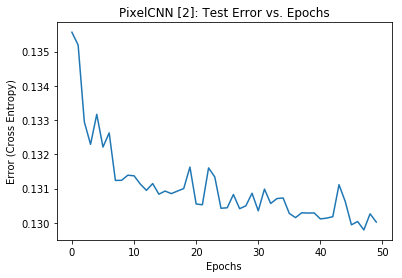

In [3]:
y2 = np.array(all_test_err)

_ = plt.plot(x, y2)
_ = plt.xlabel("Epochs")
_ = plt.ylabel("Error (Cross Entropy)")
_ = plt.title("PixelCNN [2]: Test Error vs. Epochs")
_ = plt.show()

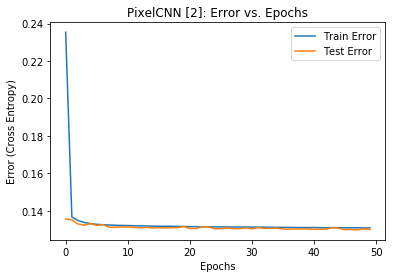

In [4]:
_ = plt.plot(x, y1)
_ = plt.plot(x, y2)
_ = plt.xlabel("Epochs")
_ = plt.ylabel("Error (Cross Entropy)")
_ = plt.title("PixelCNN [2]: Error vs. Epochs")
_ = plt.legend(['Train Error', 'Test Error'], loc='upper right')
_ = plt.show()

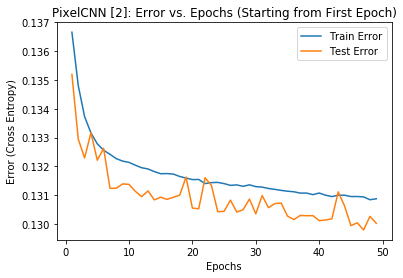

In [5]:
_ = plt.plot(x[1:], y1[1:])
_ = plt.plot(x[1:], y2[1:])
_ = plt.xlabel("Epochs")
_ = plt.ylabel("Error (Cross Entropy)")
_ = plt.title("PixelCNN [2]: Error vs. Epochs (Starting from First Epoch)")
_ = plt.legend(['Train Error', 'Test Error'], loc='upper right')
_ = plt.show()